# Manipulation de la librairie networkx

## Construction de réseaux d'interactions à partir de données MITAB.

Le format (MITAB) stocke des paires de protéines en interaction. Dans ce format, chaque colonne porte une information spécifique.
Une description du format est disponible [ici](https://psicquic.github.io/MITAB27Format.html).
Les données d'interactions impliquant les protéines surreprésentées de l'expérience ont été obtenues depuis la base de données [Intact](https://www.ebi.ac.uk/intact/home).
Ces données sont mises à votre disposition dans le fichier `data/proteins.mitab`.

Vous extrairez du fichier les paires d'identifiants uniprot des protéines en interaction.

Ces paires de protéines constituent un réseau d'interaction protéine-protéine que vous allez dessiner à l'aide de la libraire [networkx](https://networkx.org/documentation/stable/reference).
Le code suivant vous est fourni à titre d'exemple.

```python
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
G = nx.Graph()

fig, ax = plt.subplots(figsize=(8, 8))

G.add_edge('a', 'b')
G.add_edge('e', 'b')
G.add_edge('e', 'a')
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=['blue','blue','red'] , node_size=2000)
```


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import math

data = pd.read_csv('../proteins.mitab', sep='\t', header=None)
data = data.dropna()

datatcl = pd.read_csv('../TCL_wt1.tsv', sep = '\t')
datatcl = datatcl.dropna()

- 2 premiers champs : interaction entre 2 protéines
- MI : molecular interaction
- identifiants alternatifs : issus par exemple d'entrées automatiques (Trembl)
- 2 premières colonnes ici seulement
- tuples
- enlever les id uniprot
- => structure de base pour fabriquer un réseau

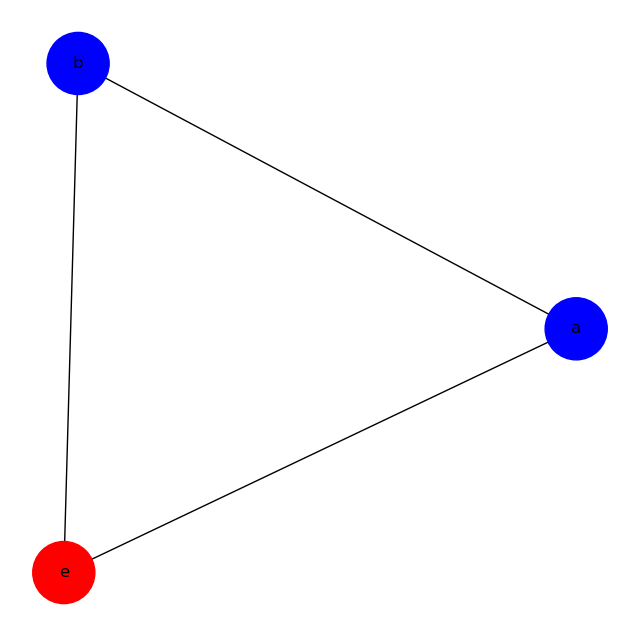

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
G = nx.Graph()

fig, ax = plt.subplots(figsize=(8, 8)) # ax pour contrôler la taille de la figure

#G.add_edge('a', 'b', weight=3)

G.add_edge('a', 'b')
G.add_edge('e', 'b')
G.add_edge('e', 'a')
pos = nx.spring_layout(G) # layout : calcule la position des noeuds
#nx.draw(G, pos)
nx.draw(G, pos, with_labels=True, node_color=['blue','blue','red'] , node_size=2000)

Les positions des noeuds sont paramétrables au travers de l'objet [layout](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html). Une fois une première représentation du réseau obtenue, affinez celle-ci afin de:

* Écrire les identifiants uniprot dans les noeuds du réseau.
* Faire du diamètre des noeuds une fonction du nombre de partenaires protéiques.
* Faire de la largeur des arêtes une fonction du nombre d'experiences (lignes MITAB) detectant cette interaction
* Colorier les arêtes soutenues par au moins une interaction de type physique entre proteines.


In [3]:
class Protein:
    def __init__(self, pid):
        self.pid = pid
        self.interactions = []
    def add_interaction(self, pid):
        self.interactions.append(pid)

class Interaction:
    def __init__(self, pid1, pid2):
        self.interactors = {pid1, pid2}

class Interactome:
    def __init__(self):
        self.interactions = dict()
    def add_interaction(self, pid1, pid2):
        key = '-'.join(sorted([pid1, pid2]))
        if key in self.interactions:
            self.interactions[key] += 1
        else:
            self.interactions[key] = 1

In [4]:
def is_interaction_physical(data, i):
    return True if data.iloc[i,11] == 'psi-mi:"MI:0915"(physical association)' else False

def get_tcl_abundance(pid):
    try:
        abundance = float(datatcl[datatcl['Accession'] == str(pid)]['Log2 Corrected Abundance Ratio'])
    except TypeError:
        abundance = -999
    return abundance

In [34]:
#print([(node, get_tcl_abundance(node)) for node in G.nodes])
print('P16528' in datatcl['Accession'].to_list())
print('P0A6X3' in datatcl['Accession'].to_list())

False
True


In [5]:
data.head(3)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,uniprotkb:P0A6X3,uniprotkb:P02358,intact:EBI-547637|uniprotkb:O24728|uniprotkb:P...,intact:EBI-543068|uniprotkb:Q2M6A5|ensemblbact...,psi-mi:hfq_ecoli(display_long)|uniprotkb:hfq(g...,psi-mi:rs6_ecoli(display_long)|uniprotkb:rpsF(...,"psi-mi:""MI:0096""(pull down)",Butland et al. (2005),pubmed:15690043|mint:MINT-5217509|imex:IM-2196...,"taxid:83333(ecoli)|taxid:83333(""Escherichia co...",...,rogid:GtjpeX6jJWI/4Pa6ClNU1UeQS4c83333,rogid:Ab2SA6wPqg/mJKUOBPK+GNJc20k83333,intact-crc:C00D693211A8275F|rigid:7kcw08tPqFGm...,False,tag:c-c,-,-,-,"psi-mi:""MI:0032""(de novo protein sequencing by...","psi-mi:""MI:0032""(de novo protein sequencing by..."
1,uniprotkb:P0ACF8,uniprotkb:P0AFG8,intact:EBI-544934|uniprotkb:P08936|ensemblbact...,intact:EBI-542683|uniprotkb:P06958|uniprotkb:P...,psi-mi:hns_ecoli(display_long)|uniprotkb:hns(g...,psi-mi:odp1_ecoli(display_long)|uniprotkb:aceE...,"psi-mi:""MI:0676""(tandem affinity purification)",Butland et al. (2005),pubmed:15690043|mint:MINT-5217509|imex:IM-2196...,"taxid:83333(ecoli)|taxid:83333(""Escherichia co...",...,rogid:z3zhSY/wN/7D3J5NmXhXr01GTtg83333,rogid:Mw8XYrFHqJcJIcvxe5fLBt8k65883333,rigid:NKQc61P84BY0qTZy6PdbvIKG3/E,False,tandem tag:c-c,-,-,-,"psi-mi:""MI:0082""(peptide massfingerprinting)","psi-mi:""MI:0082""(peptide massfingerprinting)"
2,uniprotkb:P0A6Y1,uniprotkb:P02358,intact:EBI-551813|uniprotkb:P08756|ensemblbact...,intact:EBI-543068|uniprotkb:Q2M6A5|ensemblbact...,psi-mi:ihfb_ecoli(display_long)|uniprotkb:ihfB...,psi-mi:rs6_ecoli(display_long)|uniprotkb:rpsF(...,"psi-mi:""MI:0096""(pull down)",Butland et al. (2005),pubmed:15690043|mint:MINT-5217509|imex:IM-2196...,"taxid:83333(ecoli)|taxid:83333(""Escherichia co...",...,rogid:P0Ock92RFGC3ChIfYo991CRBaGM83333,rogid:Ab2SA6wPqg/mJKUOBPK+GNJc20k83333,intact-crc:6026FC7733D5B601|rigid:QlqtbJC5UQr9...,False,tag:c-c,-,-,-,"psi-mi:""MI:0032""(de novo protein sequencing by...","psi-mi:""MI:0032""(de novo protein sequencing by..."


In [6]:
#float(datatcl[datatcl['Accession'] == 'P0A6X3']['Log2 Corrected Abundance Ratio'])
get_tcl_abundance('P0A6X3')

-0.819427754

import pandas as pd

G = nx.Graph()

mitab = '../proteins.mitab'
interactions = []
with open(mitab, 'r') as f:
    for line in f:
        line = line.rstrip().split('\t')
        p1 = line[0].split(':')[1]
        p2 = line[1].split(':')[1]
        interactions.append((p1,p2))
        G.add_edge(p1, p2)
pos = nx.spring_layout(G) # layout : calcule la position des noeuds
#nx.draw(G, pos, with_labels=False, node_size=5)

print('Interactions:', interactions[:3])

### Écrire les identifiants uniprot dans les noeuds du réseau.

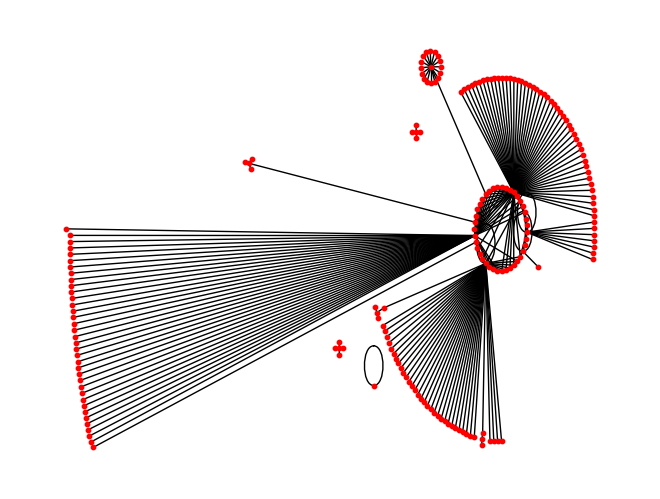

In [7]:
G = nx.Graph()

proteins = {}
interactome = Interactome()
interactions = []

#data.head(3)

for i in range(len(data)):
    p1 = data.iloc[i,0].split(':')[1]
    p2 = data.iloc[i,1].split(':')[1]
    (p1, p2) = (p1, p2) if p1 > p2 else (p2, p1)
    interactions.append((p1, p2))
    G.add_edge(p1, p2, count=0, physical=0)
    interactome.add_interaction(p1, p2)
pos = nx.spring_layout(G, k=0.2) # layout : calcule la position des noeuds
#nx.draw(G, pos, with_labels=False, node_size=5)
nx.draw(G, pos=nx.nx_agraph.graphviz_layout(G, prog='circo'), with_labels=False, node_size=10, node_color='red')

### Faire du diamètre des noeuds une fonction du nombre de partenaires protéiques.

#### G.nodes() : itération des noeuds toujours dans le même ordre
for node in G.nodes():
    print(len(G.edges(node)))

if G.has_edge('a', 'b'): # objet utilisé pour construire le graphe
    G['a']['b']['value'] = 10
else:
    G.add_edge('a','b',value=5)

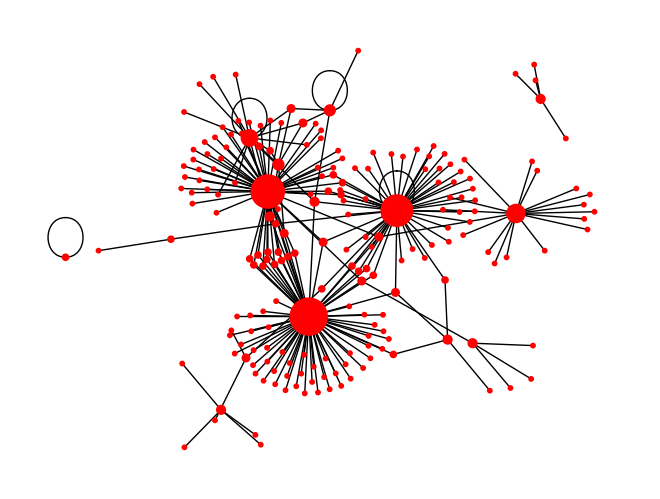

In [8]:
nx.draw(G, pos, with_labels=False, node_color=['red' for n in G.nodes()],
        node_size=[d[1]*10 for d in G.degree()]
)

### Faire de la largeur des arêtes une fonction du nombre d'experiences (lignes MITAB) detectant cette interaction

In [9]:
for prot1, prot2 in interactions:
    if not G.has_edge(prot1, prot2):
        G[prot1][prot2]['count'] = 0
    G[prot1][prot2]['count'] += 1

for i in range(len(data)):
    prot1, prot2 = interactions[i][0], interactions[i][1]
    if not G.has_edge(prot1, prot2):
        G[prot1][prot2]['physical'] = 0
    if is_interaction_physical(data, i):
        #print(data.iloc[i,0:2], is_interaction_physical(data, i))
        G[prot1][prot2]['physical'] += 1

#print(interactions[:3])

In [10]:
#print([G.get_edge_data(*e)['count'] for e in G.edges])

In [11]:
#print([G.get_edge_data(*e) for e in G.edges])

In [12]:
#[G.get_edge_data(*e) for e in G.edges]

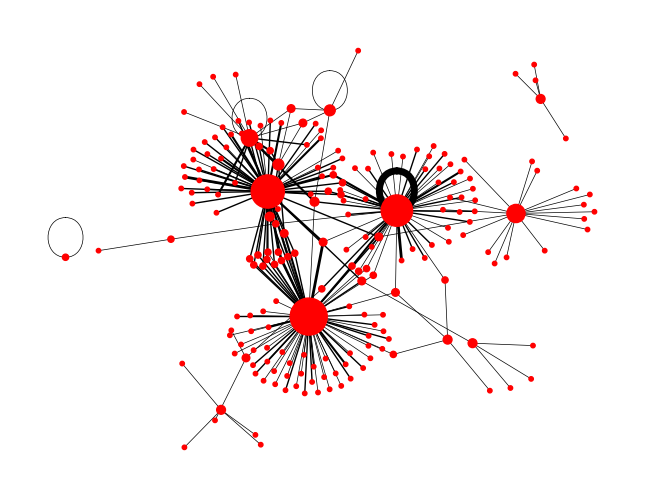

In [13]:
nx.draw(G, pos, with_labels=False, node_color=['red' for n in G.nodes()],
        node_size=[d[1]*10 for d in G.degree()],
        width=[G.get_edge_data(*e)['count']/2 for e in G.edges],
)

### Colorier les arêtes soutenues par au moins une interaction de type physique entre proteines.

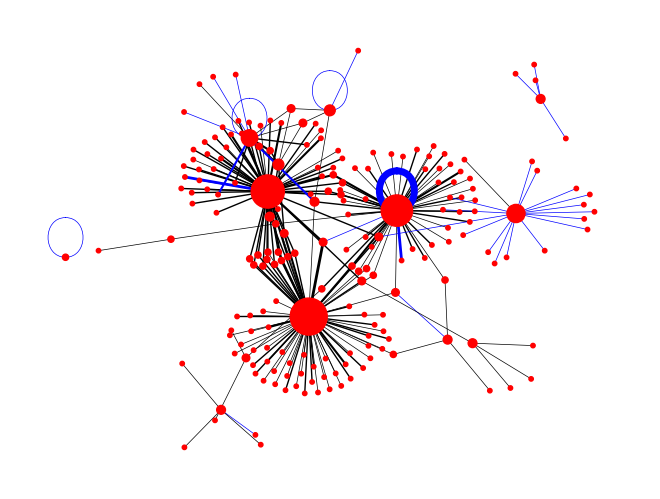

In [14]:
nx.draw(G, pos, with_labels=False, node_color=['red' for n in G.nodes()],
        node_size=[d[1]*10 for d in G.degree()],
        #node_size=[1 for d in G.degree()],
        width=[G.get_edge_data(*e)['count']/2 for e in G.edges],
        #width=[1 for e in G.edges],
        edge_color=['blue' if G.get_edge_data(*e)['physical'] > 0 else 'black' for e in G.edges]
)

## Croisement des données d'interaction et de protéomique

En utilisant les données d'abondance du fichier `TCL_wt1.tsv`, essayez de modifier le rendu du réseau pour:
* colorier dans une couleur spécifique uniquement les protéines surabondantes dans l'expérience.
* N'afficher que les noeuds des protéines mesurées dans l'experience.
* Utiliser une échelle de couleur continue fonction de l'abondance pour colorier les noeuds.
* colorier les protéines appartenant à des classes GO communes.

In [15]:
#datatcl[datatcl['Accession'] == 'P76231']['Log2 Corrected Abundance Ratio']
#data[data[11] == 'psi-mi:"MI:0915"(physical association)']

In [16]:
# Log2 Corrected Abundance Ratio : taille / couleur des cercles
# éventuellement combiner l'info avec autre chose

In [17]:
n_in = 0
n_out = 0
for node in G.nodes:
    abundance = get_tcl_abundance(node)
    if abundance > -99:
        n_in += 1
    else:
        n_out += 1

In [18]:
print(n_in, n_out)

144 60


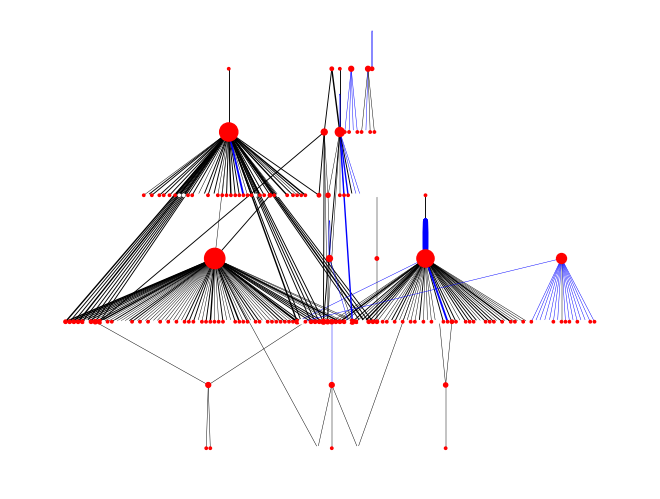

In [19]:
# >= 0 : rouge
# -999 < x < 0
# <= -999 : gris

# ['red' if get_tcl_abundance(node) > -99 else 'blue' for node in G.nodes]

abundances = [get_tcl_abundance(node) for node in G.nodes]
col = ['red' if abundance > -999 else 'white' for abundance in abundances]

nx.draw(G,
        pos=nx.nx_agraph.graphviz_layout(G, prog='dot'),
        with_labels=False,
        node_color=col,
        node_size=[d[1]*3 for d in G.degree()],
        width=[G.get_edge_data(*e)['count']/3 for e in G.edges],
        edge_color=['blue' if G.get_edge_data(*e)['physical'] > 0 else 'black' for e in G.edges]
)

# 204 noeuds, 60 pas dans l'expérience TCL

In [20]:
# MITAB : 14 abondantes

In [21]:
real_abundances = []
for abundance in abundances:
    if abundance > -999:
        real_abundances.append(abundance)

C:\Users\grego\.conda\envs\vdb1\lib\site-packages\matplotlib\cbook\__init__.py:1026: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


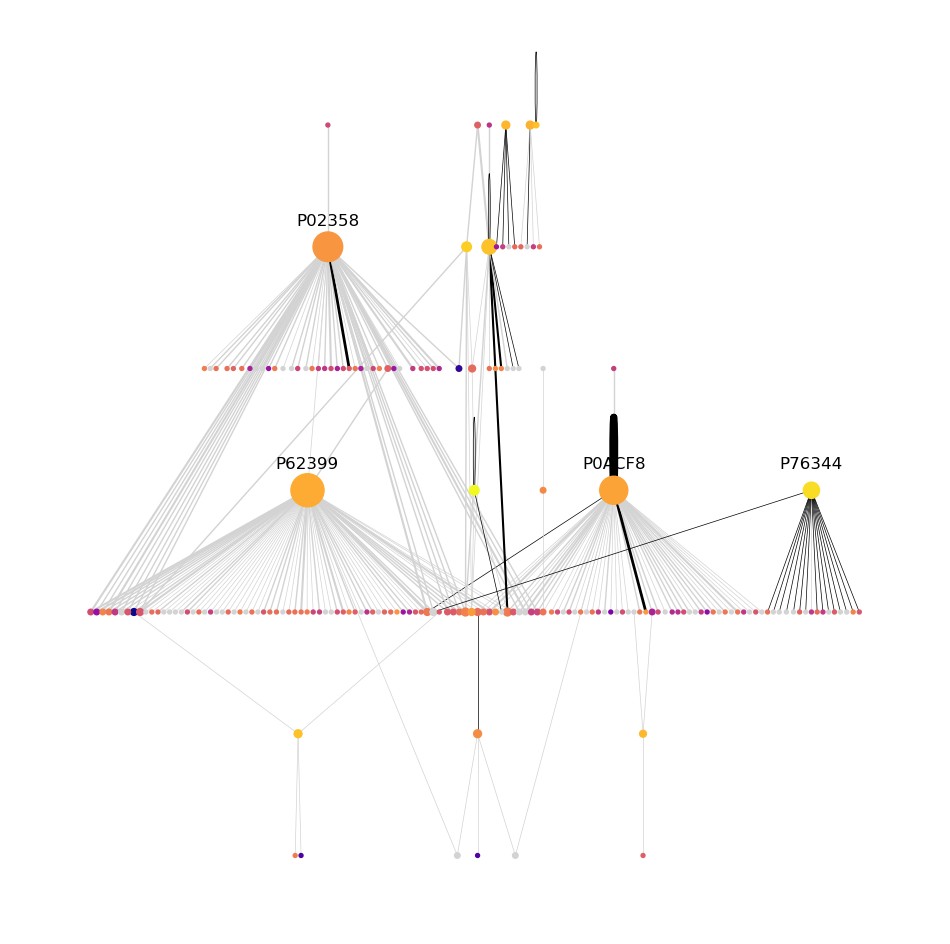

In [22]:
palette = 'plasma'
cmap = plt.get_cmap(palette)
cNorm = matplotlib.colors.Normalize(vmin = min(real_abundances), vmax = max(real_abundances))
cNormLog = matplotlib.colors.LogNorm(vmin = min(real_abundances), vmax = max(real_abundances))
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap=plt.get_cmap(palette))

colors = [scalarMap.to_rgba(ab) for ab in abundances]

labels = {}
for node in G.nodes:
    labels[node] = node if G.degree[node] > 15 else ''

# graphviz_layout prog : dot, neato, fdp, sfdp, circo, twopi

fig, ax = plt.subplots(figsize=(12,12))
pos = nx.nx_agraph.graphviz_layout(G, prog='dot')

pos2 = dict(pos)
for node in pos2:
    pos2[node] = pos2[node][0], pos2[node][1] + 15

nx.draw_networkx_labels(G, pos2, labels)
nx.draw(G,
        pos,
        with_labels=False,
        node_color=[colors[i] if abundances[i] > -999 else 'lightgrey' for i in range(len(abundances))],
        node_size=[d[1]*8 for d in G.degree()],
        width=[G.get_edge_data(*e)['count']/2 for e in G.edges],
        edge_color=['black' if G.get_edge_data(*e)['physical'] > 0 else 'lightgrey' for e in G.edges]
)

plt.savefig('Graph.png', format='png')
plt.savefig('Graph.svg', format='svg')

plt.show()

In [23]:
# GO_node_1 = o._bk.BP.getByName('ion transport')
# GO_node_2 = o._bk.BP.getById('GO:0006811')
# goNode.eTag contient tous les id de prots comprenant ce terme

In [24]:
for node in pos:
    pos[node] = pos[node][0], pos[node][1] + 20